# Know Your Style: Fashion-MNIST Exploration + Classification



Fashion-MNIST: 70,000 grayscale 28×28 images of 10 clothing types.  

Goal: EDA + simple CNN to classify items (T-shirt, Trouser, Dress, etc.).



Classes:  

0: T-shirt/top  

1: Trouser  

2: Pullover  

3: Dress  

4: Coat  

5: Sandal  

6: Shirt  

7: Sneaker  

8: Bag  

9: Ankle boot

In [1]:
# ── Imports ──────

import tensorflow as tf

from tensorflow.keras import layers, models

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.utils import to_categorical



import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

import random

In [2]:
# ── Load Data ──────

#initialize taining and testing data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


#output/ classification output

class_names = [

    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',

    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

]



print("Train shape:", x_train.shape, y_train.shape)

print("Test shape :", x_test.shape, y_test.shape)



# Normalize pixel values to [0,1]

x_train = x_train.astype('float32') / 255.0

x_test = x_test.astype('float32') / 255.0



# Add channel dimension (CNN expects (28,28,1))

x_train = np.expand_dims(x_train, -1)

x_test = np.expand_dims(x_test, -1)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28) (60000,)
Test shape : (10000, 28, 28) (10000,)


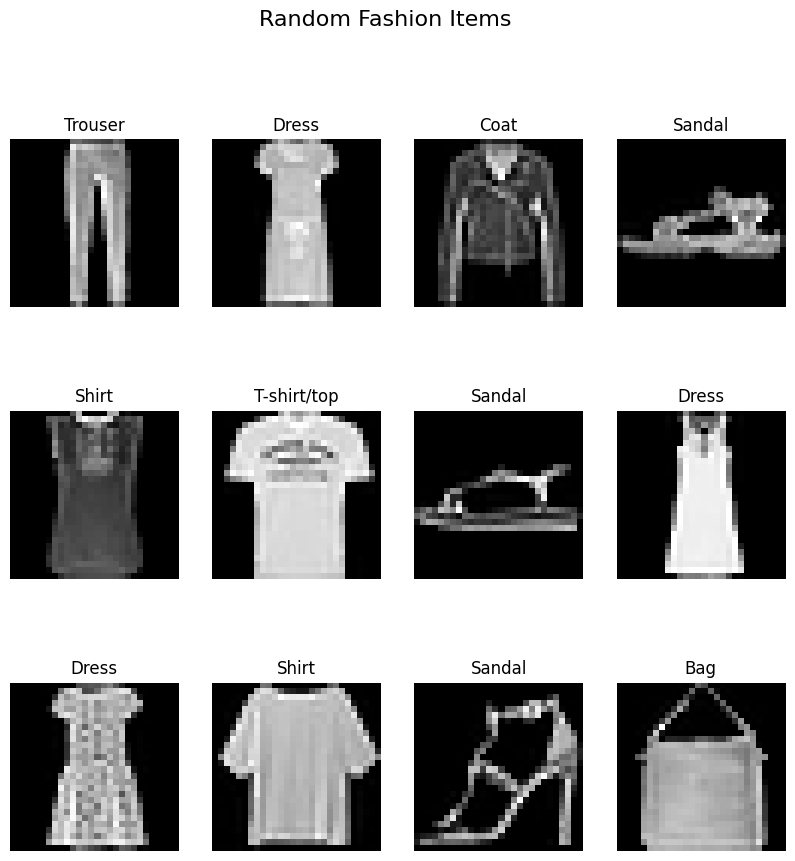

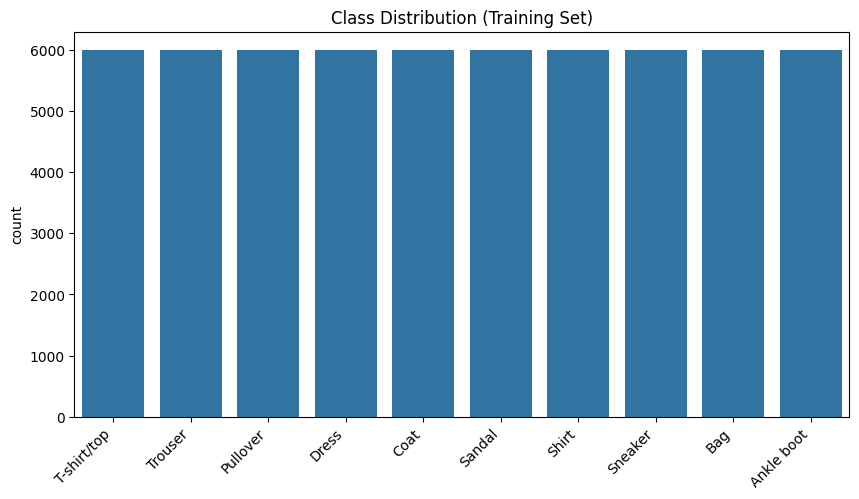

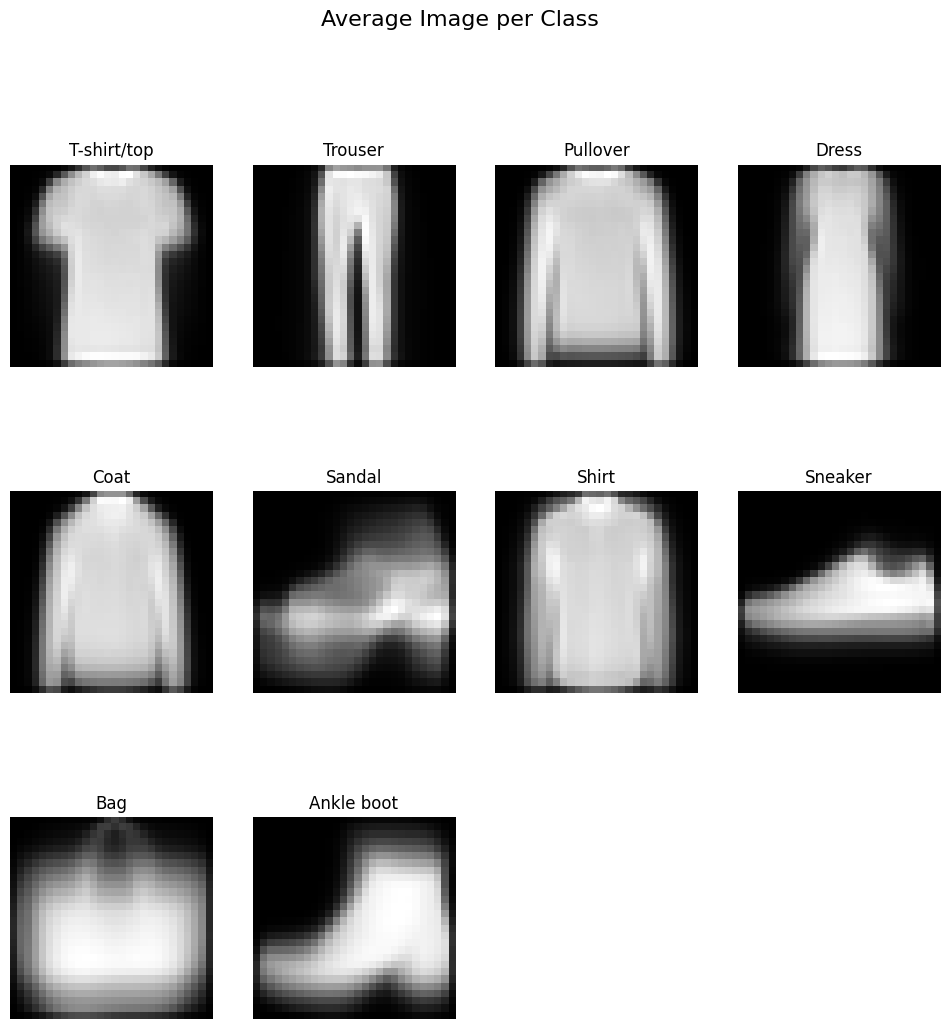

In [3]:
# ── EDA ────

# 12 random images

plt.figure(figsize=(10,10))

for i in range(12):

    idx = random.randint(0, len(x_train)-1)

    plt.subplot(3,4,i+1)

    plt.imshow(x_train[idx].squeeze(), cmap='gray')

    plt.title(class_names[y_train[idx]])

    plt.axis('off')

plt.suptitle("Random Fashion Items", fontsize=16)

plt.show()



# Class distribution

plt.figure(figsize=(10,5))

sns.countplot(x=[class_names[y] for y in y_train], order=class_names)

plt.xticks(rotation=45, ha='right')

plt.title("Class Distribution (Training Set)")

plt.show()



# Average image per class

plt.figure(figsize=(12,12))

for i in range(10):

    mask = (y_train == i)

    avg_img = np.mean(x_train[mask], axis=0).squeeze()

    plt.subplot(3,4,i+1)

    plt.imshow(avg_img, cmap='gray')

    plt.title(class_names[i])

    plt.axis('off')

plt.suptitle("Average Image per Class", fontsize=16)

plt.show()

In [4]:
# ── Prepare data for classification ─────

y_train_cat = to_categorical(y_train, 10)

y_test_cat = to_categorical(y_test, 10)


In [5]:
# ── Build simple CNN ─────

model = models.Sequential([

    #Input layer
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    layers.MaxPooling2D((2,2)),

    #hidden layers

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.MaxPooling2D((2,2)),



    layers.Conv2D(64, (3,3), activation='relu'),



    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dropout(0.5),

    #output layer

    layers.Dense(10, activation='softmax')

])



model.summary()



model.compile(

    optimizer='adam',

    loss='categorical_crossentropy',

    metrics=['accuracy']

)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# ── Train ────

history = model.fit(

    x_train, y_train_cat,

    epochs=10, # 10–15 is usually enough

    batch_size=128,

    validation_split=0.2,

    verbose=1

)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 116ms/step - accuracy: 0.5823 - loss: 1.1575 - val_accuracy: 0.8262 - val_loss: 0.4725
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 60s 161ms/step - accuracy: 0.8087 - loss: 0.5356 - val_accuracy: 0.8547 - val_loss: 0.3915
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 63s 111ms/step - accuracy: 0.8414 - loss: 0.4540 - val_accuracy: 0.8733 - val_loss: 0.3435
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.8622 - loss: 0.3933 - val_accuracy: 0.8827 - val_loss: 0.3182
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.8723 - loss: 0.3666 - val_accuracy: 0.8895 - val_loss: 0.3022
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.8808 - loss: 0.3424 - val_accuracy: 0.8912 - val_loss: 0.2893
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.8868 - loss: 0.3219 - val_accuracy: 0.8921 - val_loss: 0.2936
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.8925 - loss: 0

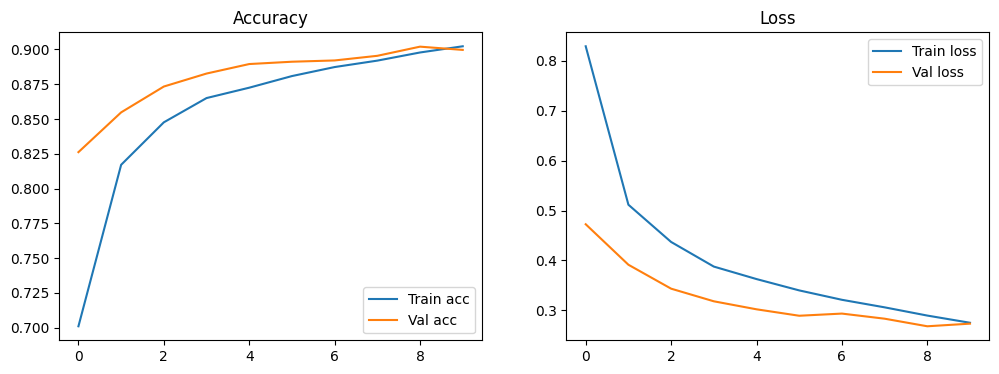

In [7]:
# ── Plot training history ───────

plt.figure(figsize=(12,4))



plt.subplot(1,2,1)

plt.plot(history.history['accuracy'], label='Train acc')

plt.plot(history.history['val_accuracy'], label='Val acc')

plt.title('Accuracy')

plt.legend()



plt.subplot(1,2,2)

plt.plot(history.history['loss'], label='Train loss')

plt.plot(history.history['val_loss'], label='Val loss')

plt.title('Loss')

plt.legend()



plt.show()

Test accuracy: 0.8935
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


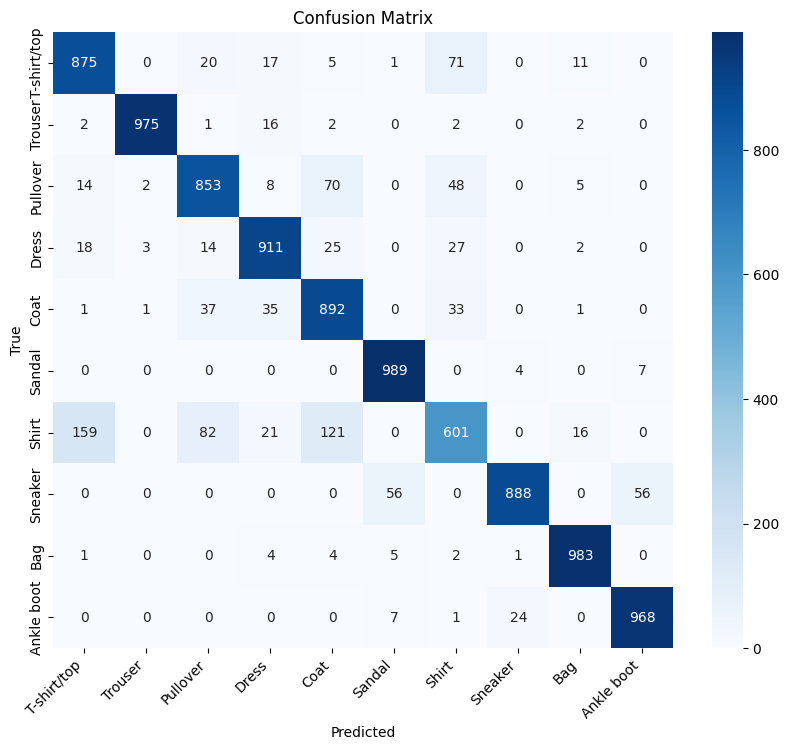

In [8]:
# ── Evaluate on test set ─────

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)

print(f"Test accuracy: {test_acc:.4f}")


# Predictions

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)


# Confusion matrix

cm = confusion_matrix(y_test, y_pred_classes)



plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',

            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')

plt.ylabel('True')

plt.title('Confusion Matrix')

plt.xticks(rotation=45, ha='right')

plt.show()

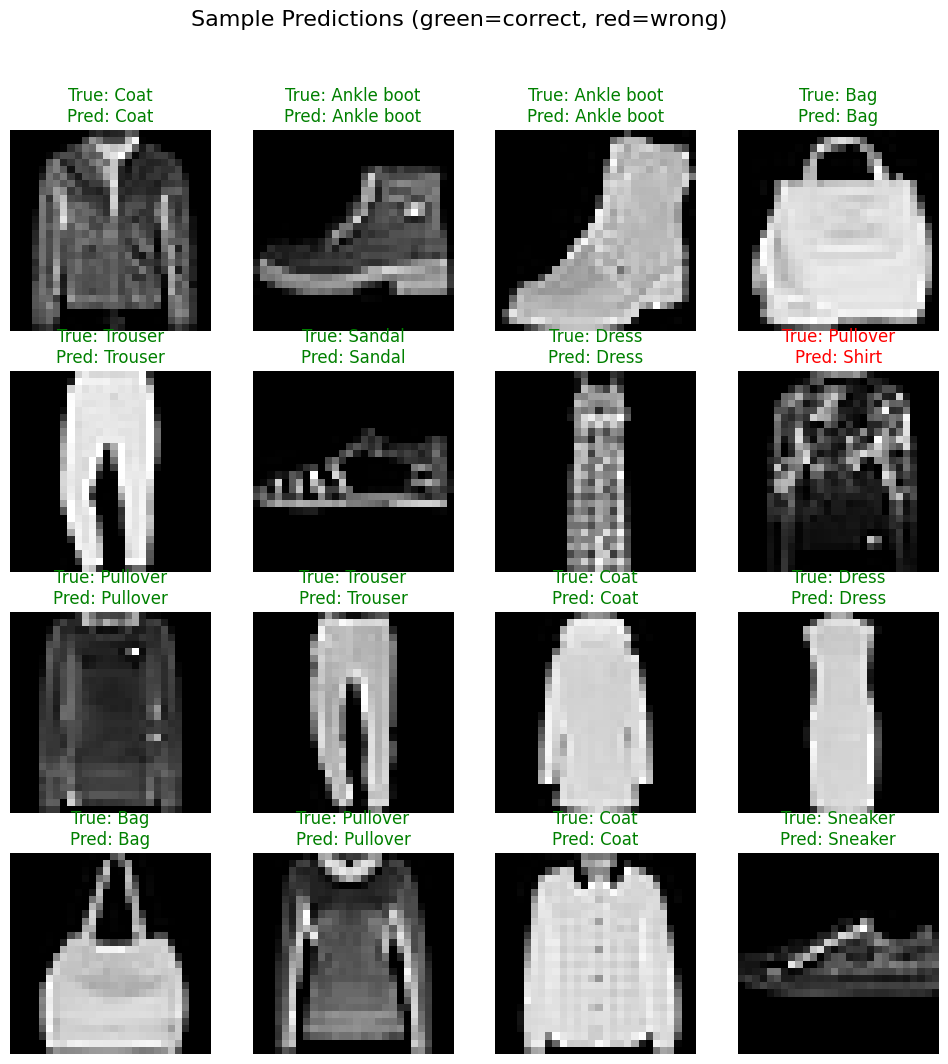

In [9]:
# ── Sample predictions ───────

plt.figure(figsize=(12,12))

for i in range(16):

    idx = random.randint(0, len(x_test)-1)

    plt.subplot(4,4,i+1)

    plt.imshow(x_test[idx].squeeze(), cmap='gray')

    true = class_names[y_test[idx]]

    pred = class_names[y_pred_classes[idx]]

    color = 'green' if true == pred else 'red'

    plt.title(f"True: {true}\nPred: {pred}", color=color)

    plt.axis('off')

plt.suptitle("Sample Predictions (green=correct, red=wrong)", fontsize=16)

plt.show()

Quick style vibe check:


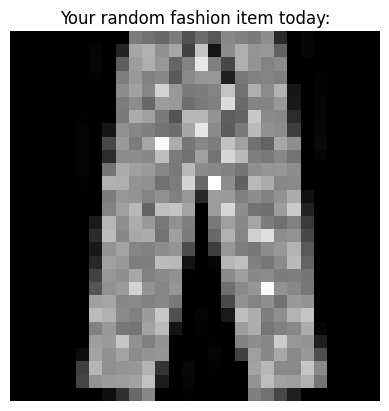

What do you think this is? 👀
(Answer: Trouser)


In [10]:
print("Quick style vibe check:")

random_idx = np.random.randint(0, len(x_test))

plt.imshow(x_test[random_idx], cmap='gray')

plt.title("Your random fashion item today:")

plt.axis('off')

plt.show()



print("What do you think this is? 👀")

print("(Answer: " + class_names[y_test[random_idx]] + ")")

## Summary

- EDA: Images, class balance, average per class, Quick style vibe check.

- Model: Simple CNN → ~90–92% test accuracy in 10 epochs of training.

- Next ideas: Add dropout, data augmentation, try transfer learning (ResNet on resized images), or build a "what's your style" predictor.



Feel free to fork & play! 👗🔍